# DA Final project:

# Group 5

# Shark Attack

###  Name of students:
Ohad Rosenson<br>
Yoav Yekutiel<br>



<a id='top'></a>

<div>
<img src="https://raw.githubusercontent.com/YoavYekutiel/Project-attacks/main/shark-swimming-water-1200x800.webp" width="500"/>
<div>


In [48]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

#### Information on the data
The target of our project is to find details that affect shark attacks on people and to minimize these attacks. <br>taken from [Kaggle](https://www.kaggle.com/datasets/felipeesc/shark-attack-dataset)


In [49]:
url1 = 'https://raw.githubusercontent.com/YoavYekutiel/Project-attacks/main/sharck_attack_part_2UPD.csv'#כשפיצלנו את הקובץ , לאחר הפיצול נשארו בקובץ המון שורות ריקות ולכן יצרנו משתנה חדש שבו מצויות רק שורות עם נתונים
df = pd.read_csv(url1)
shark_df2 = df.iloc[:2809]
url2 = 'https://raw.githubusercontent.com/YoavYekutiel/Project-attacks/main/sharck_attack_part_1UPD.csv'
shark_df1 = pd.read_csv(url2)
shark_df = pd.concat([shark_df1 ,shark_df2]).reset_index()#כעת נחבר את הקבצים, מאחר ואנחנו רוצים לעבוד באותו סדר שבו עבדו בקובץ , נרצה שההתחלה של הקובץ יהיו השנים המעודכנות ואילו בסוף יהיו השנים המאוחרות
shark_df.shape

(6309, 25)

In [51]:
shark_df.columns


Index(['index', 'Case Number', 'Date', 'Year', 'Type', 'Country', 'Area',
       'Location', 'Activity', 'Name', 'Sex ', 'Age', 'Injury', 'Fatal (Y/N)',
       'Time', 'Species ', 'Investigator or Source', 'pdf', 'href formula',
       'href', 'Case Number.1', 'Case Number.2', 'original order',
       'Unnamed: 22', 'Unnamed: 23'],
      dtype='object')

In [52]:
shark_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6309 entries, 0 to 6308
Data columns (total 25 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   index                   6309 non-null   int64  
 1   Case Number             6308 non-null   object 
 2   Date                    6302 non-null   object 
 3   Year                    6300 non-null   float64
 4   Type                    6298 non-null   object 
 5   Country                 6252 non-null   object 
 6   Area                    5847 non-null   object 
 7   Location                5762 non-null   object 
 8   Activity                5758 non-null   object 
 9   Name                    6092 non-null   object 
 10  Sex                     5737 non-null   object 
 11  Age                     3471 non-null   object 
 12  Injury                  6274 non-null   object 
 13  Fatal (Y/N)             5763 non-null   object 
 14  Time                    2948 non-null   

# Arranging the columns so the relevant data is displayed in each column 

In [10]:
counts_of_each_activity = shark_df['Activity'].value_counts() #סידור מחדש עבור activity
frequent_activities = counts_of_each_activity[counts_of_each_activity >= 50].index
shark_df['Frequent_Activity'] = shark_df['Activity'].apply(lambda x: x if x in frequent_activities else pd.NA) # יצירת עמודה חדשה שבה מצויים כלל הפעילויות שמופיעות מעל 50 פעם בdata
shark_df['Frequent_Activity'].unique()
shark_df['Frequent_Activity'] = shark_df['Frequent_Activity'].replace({'Scuba diving': 'Diving','Snorkeling': 'Diving'}) #איחוד המשתנים כך שכל סוגי הצלילה ייכנסו תחת הקבוצה של הצלילה הכולל
shark_df['Frequent_Activity'] = shark_df['Frequent_Activity'].replace({'Spearfishing':'Fishing'})
shark_df['Frequent_Activity'] = shark_df['Frequent_Activity'].replace({'Body boarding':'Surfing'})
shark_df['Frequent_Activity'].unique()

array([<NA>, 'Standing', 'Surfing', 'Swimming', 'Fishing', 'Diving',
       'Wading', 'Bathing'], dtype=object)

In [63]:
counts_of_species= shark_df['Species '].value_counts() # סידור עמודת Species
frequent_species = counts_of_species[counts_of_species >= 10].index
shark_df['Species'] = shark_df['Species '].apply(lambda x: x if x in frequent_species else pd.NA)
shark_df['Species'] = shark_df['Species'].apply(lambda x: 'Shark involvement not confirmed' if pd.notnull(x) and 'confirmed' in x else x)
shark_df['Species'] = shark_df['Species'].apply(lambda x: 'white shark' if pd.notnull(x) and 'hite' in x else x)
shark_df['Species'] = shark_df['Species'].replace({"Questionable":"Questionable incident"})
shark_df['Species'].unique()

array(['white shark', <NA>, '2 m shark', 'Tiger shark',
       'Shark involvement not confirmed', 'Questionable incident',
       '3 m shark', "6' shark", 'Bull shark', 'Wobbegong shark',
       'Blacktip shark', "5' shark", "4' to 5' shark", 'Nurse shark',
       "4' shark", "3' shark", "10' shark", "3' to 4' shark", 'Invalid',
       'Blue shark', 'Mako shark', 'No shark involvement', '1.5 m shark',
       "7' shark", 'Grey nurse shark', 'Raggedtooth shark',
       'Zambesi shark', 'Bronze whaler shark', '"a small shark"',
       "12' shark", "1.8 m [6'] shark", "3 m [10'] shark",
       "2.4 m [8'] shark", "1.2 m [4'] shark",
       "1.2 m to 1.5 m [4' to 5'] shark", "1.5 m [5'] shark",
       "3.7 m [12'] shark"], dtype=object)

In [64]:
shark_df['Fatal (Y/N)'] = shark_df['Fatal (Y/N)'].replace({" N":"N","y":"Y"}) # סידור fatal 
counts_of_fatal_incident = shark_df["Fatal (Y/N)"].value_counts()
fatal_incident = counts_of_fatal_incident[counts_of_fatal_incident >= 10].index
fatal_incident
shark_df['fatal_incident'] = shark_df['Fatal (Y/N)'].apply(lambda x: x if x in fatal_incident else pd.NA)
shark_df['fatal_incident'] = shark_df['fatal_incident'].replace('UNKNOWN', pd.NA)

shark_df['fatal_incident'].unique()

array(['N', 'Y', <NA>], dtype=object)

In [76]:
shark_df['Sex'] = shark_df['Sex '].replace('M ', 'M')
shark_df['Sex'] = shark_df['Sex '].map({'M':'M','F':'F'})
shark_df['Sex'].unique()

array(['F', 'M', nan], dtype=object)

In [70]:
top_15 = shark_df['Country'].value_counts().head(15)
shark_df['Top_Country'] = shark_df['Country'].apply(lambda x: x if x in top_15.index else None)
shark_df['Top_Country'].unique()

array(['USA', 'AUSTRALIA', 'MEXICO', 'BRAZIL', None, 'SOUTH AFRICA',
       'BAHAMAS', 'NEW CALEDONIA', 'CUBA', 'NEW ZEALAND', 'REUNION',
       'PHILIPPINES', 'MOZAMBIQUE', 'FIJI', 'ITALY', 'PAPUA NEW GUINEA'],
      dtype=object)

In [23]:
shark_df['D_Time'] = shark_df['Time'].str.replace('h', ':', regex=False)
shark_df['D_Time'] = pd.to_datetime(shark_df['D_Time'], format='%H:%M', errors='coerce')
shark_df['Time_Category'] = pd.cut(shark_df['D_Time'].dt.hour, bins=[0, 12, 18, 24], labels=['Morning', 'Noon', 'evening'], right=False)
shark_df['Time_Category'] .unique()

['evening', NaN, 'Morning', 'Noon']
Categories (3, object): ['Morning' < 'Noon' < 'evening']

In [80]:
shark_df['Injury_Types'] = shark_df['Injury'].apply(lambda x: 'bite' if pd.notnull(x) and 'bit' in x else ('No injury' if pd.notnull(x) and 'No injury' in x else x))
top_Injury= shark_df['Injury_Types'].value_counts().head(20).index
shark_df['Top_Injury'] = shark_df['Injury_Types'].apply(lambda x: x if x in top_Injury else 'NON')
shark_df['Top_Injury'].unique()


array(['No injury', 'NON', 'bite', 'FATAL', 'Lacerations to left foot',
       'Minor injuries', 'Lacerations to right foot',
       'Lacerations to foot', 'Leg injured', 'Laceration to left foot',
       'Lacerations to right hand', 'Lacerations to leg', 'Minor injury',
       'No details', 'Leg severed', 'Survived', 'Foot severed',
       'Foot lacerated', 'FATAL, leg severed ',
       'FATAL, body not recovered', 'Leg lacerated'], dtype=object)

In [83]:
shark_df['Date'] = pd.to_datetime(shark_df['Date'], errors='coerce')
shark_df['Month'] = shark_df['Date'].dt.month
month_map = {
    1: 'January', 2: 'February', 3: 'March', 4: 'April', 5: 'May', 6: 'June',
    7: 'July', 8: 'August', 9: 'September', 10: 'October', 11: 'November', 12: 'December'
}
shark_df['Month'] = shark_df['Month'].map(month_map)
shark_df['Month'].unique()

C:\Users\user\AppData\Local\Temp\ipykernel_5428\1568330965.py:1: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  shark_df['Date'] = pd.to_datetime(shark_df['Date'], errors='coerce')


array(['June', 'May', nan, 'April', 'March', 'February', 'January',
       'December', 'November', 'October', 'September', 'August', 'July'],
      dtype=object)

###First Conclusion:

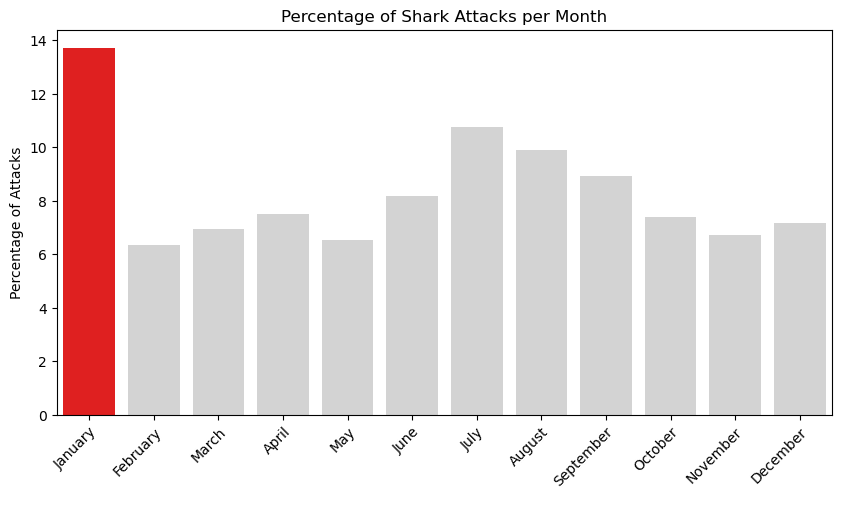

In [127]:
attacks_per_month = shark_df['Month'].value_counts(normalize=True).sort_index() * 100
attacks_per_month_df = attacks_per_month.reset_index()
attacks_per_month_df.columns = ['Month', 'Percentage']
palette_colors = ['red' if month == 'January' else 'lightgray' for month in attacks_per_month_df['Month']]
plt.figure(figsize=(10, 5))
sns.barplot(data=attacks_per_month_df, x='Month', y='Percentage',order = attacks_per_month_df['Month'],palette = palette_colors)
plt.title('Percentage of Shark Attacks per Month')
plt.xlabel(' ')
plt.ylabel('Percentage of Attacks')
plt.xticks(rotation=45, ha='right', rotation_mode='anchor')
plt.show()

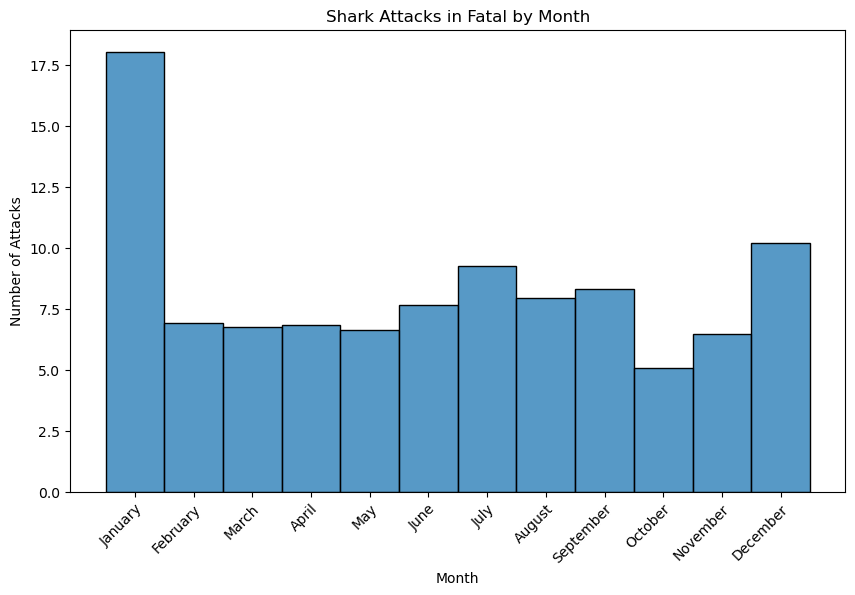

In [130]:
attacks_per_month_df
fatal_filtered = shark_df[shark_df['Fatal (Y/N)']== 'Y']

fig, ax = plt.subplots(figsize=(10, 6))
sns.histplot(data=fatal_filtered, x='Month',stat = 'percent')

# כותרות לצירים ולגרף
ax.set_title('Shark Attacks in Fatal by Month')
ax.set_xlabel('Month')
ax.set_ylabel('Number of Attacks')
plt.xticks(rotation=45, ha='right', rotation_mode='anchor')
# הצגת הגרף
plt.show()

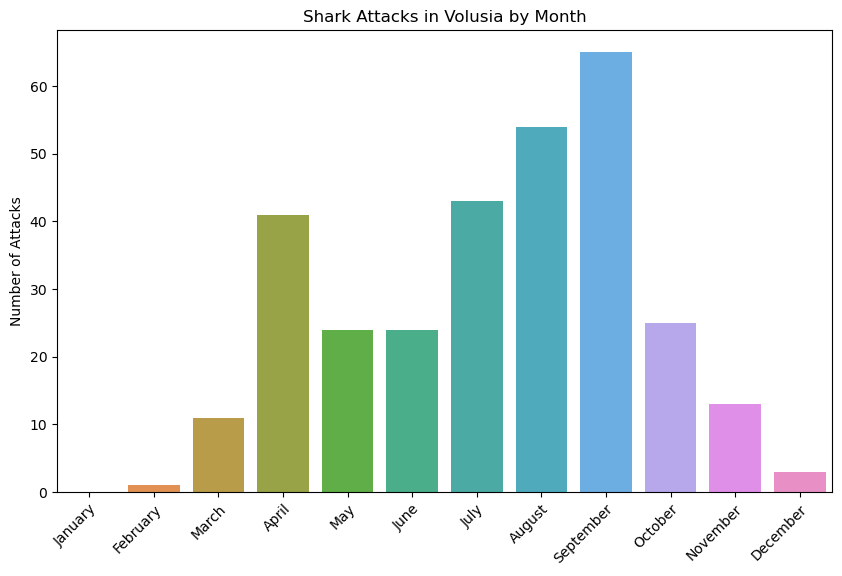

In [124]:
filtered_data = shark_df[shark_df['Location'].str.contains('Volusia', na=False)]
fig, ax = plt.subplots(figsize=(10, 6))
sns.countplot(data=filtered_data, x='Month', ax=ax)

# כותרות לצירים ולגרף
ax.set_title('Shark Attacks in Volusia by Month')
ax.set_xlabel('')
ax.set_ylabel('Number of Attacks')
plt.xticks(rotation=45, ha='right', rotation_mode='anchor' )
# הצגת הגרף
plt.show()

In [ ]:
shark_df['Age'] = pd.to_numeric(shark_df['Age'], errors='coerce')

In [47]:
shark_df['age_bins'] = pd.cut(shark_df['Age'], bins = 3, labels = ('young', 'middle_age', 'old' ))


TypeError: '<=' not supported between instances of 'str' and 'float'

In [46]:
S = shark_df[shark_df['age_bins']== 'young' ]
S['Fatal (Y/N)'].value_counts()


A = shark_df[(shark_df['Top_Country']== 'AUSTRALIA')  & (shark_df['Month'] =='January')& (shark_df['age_bins']== 'young') ]
A['Fatal (Y/N)'].value_counts()

KeyError: 'age_bins'

In [29]:
shark_df['Top_Country'].value_counts()

Top_Country
USA                 2229
AUSTRALIA           1338
SOUTH AFRICA         579
PAPUA NEW GUINEA     134
NEW ZEALAND          128
BRAZIL               112
BAHAMAS              109
MEXICO                89
ITALY                 71
FIJI                  62
PHILIPPINES           61
REUNION               60
NEW CALEDONIA         53
CUBA                  46
MOZAMBIQUE            45
Name: count, dtype: int64

In [30]:
shark_df['Location'].value_counts()

Location
New Smyrna Beach, Volusia County                  163
Daytona Beach, Volusia County                      30
Ponce Inlet, Volusia County                        20
Melbourne Beach, Brevard County                    18
Myrtle Beach, Horry County                         17
                                                 ... 
Whale Beach                                         1
l'Anse-Vata                                         1
Hole-in-the Wall                                    1
Wreck of the Navy Barge, 22 miles SE of Rudee       1
Below the English fort, Trincomalee                 1
Name: count, Length: 4108, dtype: int64

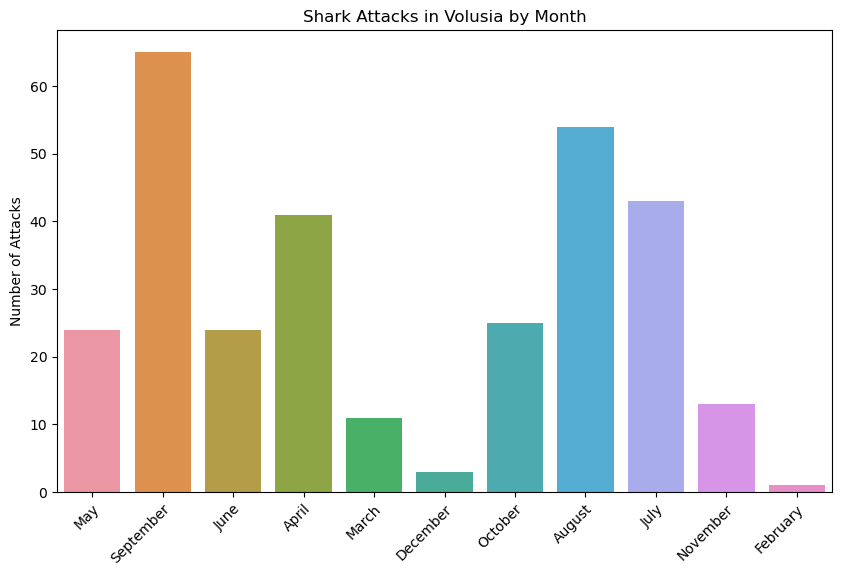

In [31]:
filtered_data = shark_df[shark_df['Location'].str.contains('Volusia', na=False)]

fig, ax = plt.subplots(figsize=(10, 6))
sns.countplot(data=filtered_data, x='Month', ax=ax)

# כותרות לצירים ולגרף
ax.set_title('Shark Attacks in Volusia by Month')
ax.set_xlabel('')
ax.set_ylabel('Number of Attacks')
plt.xticks(rotation=45, ha='right', rotation_mode='anchor' )
# הצגת הגרף
plt.show()

In [32]:
january_attacks = shark_df[shark_df['Month'] == 'January']
attacks_by_country = january_attacks['Top_Country'].value_counts()
print(attacks_by_country)

Top_Country
AUSTRALIA           215
SOUTH AFRICA        122
USA                 106
PAPUA NEW GUINEA     37
NEW ZEALAND          31
MOZAMBIQUE           13
CUBA                 12
BRAZIL                9
REUNION               9
FIJI                  8
NEW CALEDONIA         7
MEXICO                7
BAHAMAS               4
ITALY                 4
PHILIPPINES           2
Name: count, dtype: int64


### Conclusion 2:


In [34]:
order_count = shark_df['Frequent_Activity'].value_counts().index

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


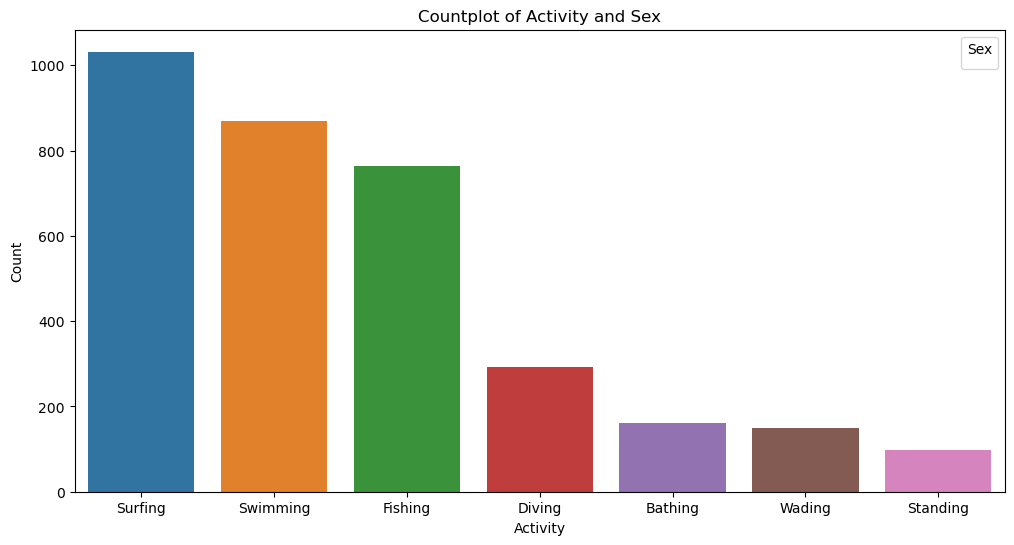

In [35]:
plt.figure(figsize=(12, 6))
sns.countplot(x='Frequent_Activity', data=shark_df ,order = order_count)
plt.title('Countplot of Activity and Sex')
plt.xlabel('Activity')
plt.ylabel('Count')
plt.legend(title='Sex')
plt.show()

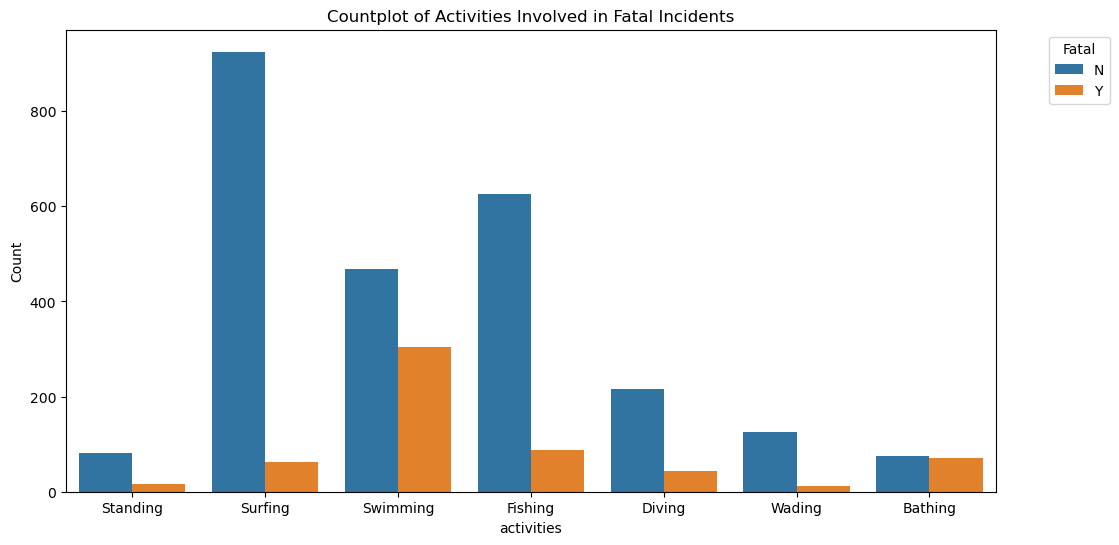

In [39]:
plt.figure(figsize=(12, 6))
sns.countplot(data=shark_df, x='Frequent_Activity',hue= 'fatal_incident')
plt.title('Countplot of Activities Involved in Fatal Incidents')
plt.xlabel('activities')
plt.ylabel('Count')
plt.legend(title='Fatal', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

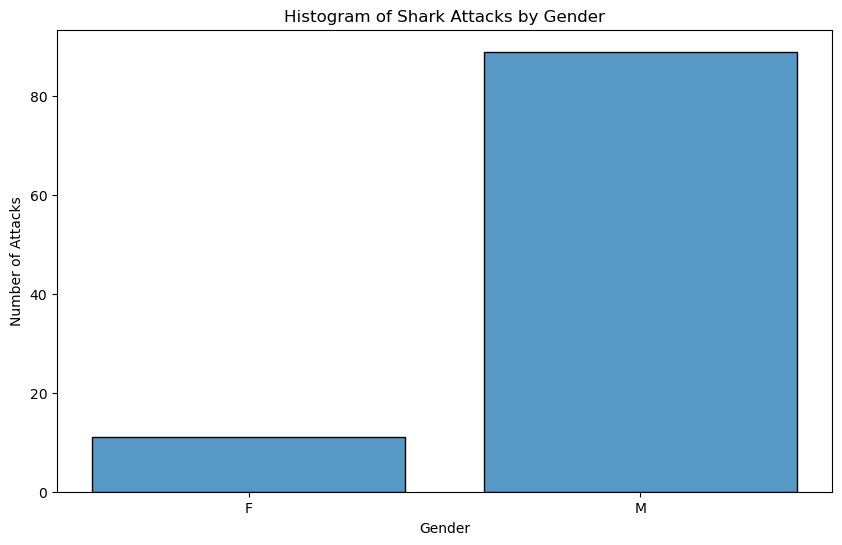

In [40]:
plt.figure(figsize=(10, 6))
sns.histplot(data=shark_df, x='Sex', discrete=True, shrink=0.8,stat = 'percent')
plt.title('Histogram of Shark Attacks by Gender')
plt.xlabel('Gender')
plt.ylabel('Number of Attacks')
plt.show()

In [41]:
Female_incidents = shark_df[shark_df['Sex'] == 'F'] # נראה את האיזור שבו הותקפו הכי הרבה נשים
Female_incidents['Area'].value_counts()

Area
Florida                154
Hawaii                  45
South Carolina          40
New South Wales         31
California              29
                      ... 
Guam                     1
Loyalty Islands          1
US Virgin Islands        1
Galapagos Islands        1
Kadavu Island Group      1
Name: count, Length: 150, dtype: int64

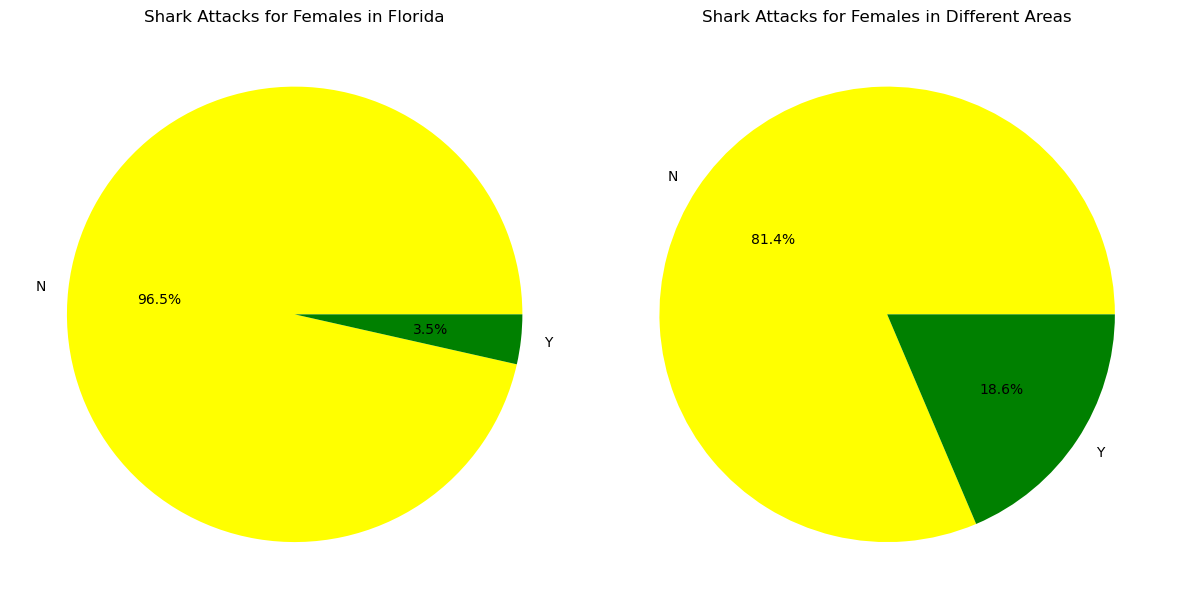

In [43]:
Incidents_Florida_female = Female_incidents[Female_incidents['Area'] == 'Florida']
florida_fatal_female = Incidents_Florida_female['fatal_incident'].value_counts()
all_fatal_female = Female_incidents['fatal_incident'].value_counts()
fig, ax = plt.subplots(1, 2, figsize=(12, 6))

# גרף עוגה ראשון: התקיפות בפלורידה לנשים
ax[0].pie(florida_fatal_female, labels=florida_fatal_female.index, autopct='%1.1f%%', colors=['yellow', 'green'])
ax[0].set_title('Shark Attacks for Females in Florida')

# גרף עוגה שני: התקיפות לנשים באזורים שונים
ax[1].pie(all_fatal_female, labels=all_fatal_female.index, autopct='%1.1f%%', colors=['yellow', 'green'])
ax[1].set_title('Shark Attacks for Females in Different Areas')

plt.tight_layout()
plt.show()

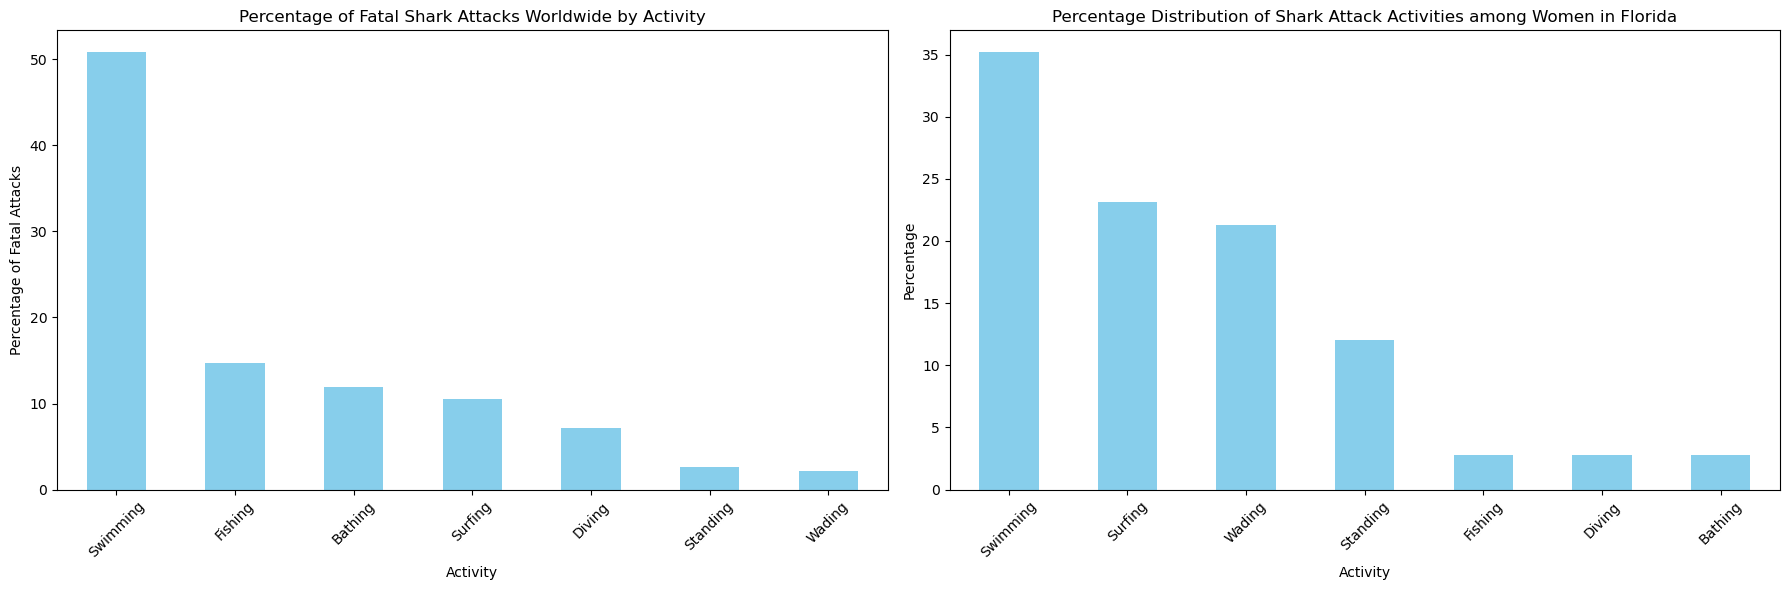

In [44]:
fatal_attacks_worldwide = shark_df[(shark_df['Fatal (Y/N)'] == 'Y')]

# בדיקה שיש נתונים תקפים לפני שיציג את הגרף
if not fatal_attacks_worldwide.empty:
    # חישוב האחוזים לפי פעילות (Activity)
    activity_percentages = fatal_attacks_worldwide['Frequent_Activity'].value_counts(normalize=True) * 100

    # יצירת גרף עמודות לפי פעילות באחוזים
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(18, 6))

    # גרף הראשון - תקריות קטלניות בכל העולם
    activity_percentages.plot(kind='bar', color='skyblue', ax=ax1)
    ax1.set_title('Percentage of Fatal Shark Attacks Worldwide by Activity')
    ax1.set_xlabel('Activity')
    ax1.set_ylabel('Percentage of Fatal Attacks')
    ax1.tick_params(axis='x', rotation=45)


    # סינון הנתונים לפי פעילות של נשים בפלורידה
    women_in_florida = shark_df[(shark_df['Area'] == 'Florida') & (shark_df['Sex'] == 'F')]

    # בדיקה שיש נתונים תקפים לפני שיציג את הגרף
    if not women_in_florida.empty:
        # חישוב האחוזים לפי פעילות (Activity)
        activity_percentages_florida = women_in_florida['Frequent_Activity'].value_counts(normalize=True) * 100

        # גרף השני - פעילות של נשים בפלורידה
        activity_percentages_florida.plot(kind='bar', color='skyblue', ax=ax2)
        ax2.set_title('Percentage Distribution of Shark Attack Activities among Women in Florida')
        ax2.set_xlabel('Activity')
        ax2.set_ylabel('Percentage')
        ax2.tick_params(axis='x', rotation=45)
    else:
        ax2.text(0.5, 0.5, 'No data available', horizontalalignment='center', verticalalignment='center', transform=ax2.transAxes)

    # הצגת הגרפים
    plt.tight_layout()
    plt.show()